In [4]:
import os
import pandas as pd
from matplotlib import pyplot as plt

from google.cloud import bigquery
os.environ['GOOGLE_APPLICATION_CREDENTIALS']=f"/home/jovyan/.config/gcloud/legacy_credentials/{os.getenv('JUPYTERHUB_USER')}/adc.json" 

bq = bigquery.Client(project='gcp-wow-rwds-ai-mmm-prod')

In [10]:
sql = '''
    SELECT 
        fw_start_date AS ds, 
        SUM(TotalAmountExcldTax) AS sales
    FROM `gcp-wow-ent-im-wowx-cust-prod.adp_wowx_dm_integrated_sales_view.article_sales_summary_v` a
        JOIN `gcp-wow-rwds-ai-data-prod.loyalty_bi_analytics.dim_date` b
            ON a.TXNStartDate = b.clndr_date
    WHERE fw_start_date BETWEEN '2016-07-01' AND '2021-06-30'
    GROUP BY 1
    ORDER BY 1;
'''

df = bq.query(sql).result().to_dataframe()

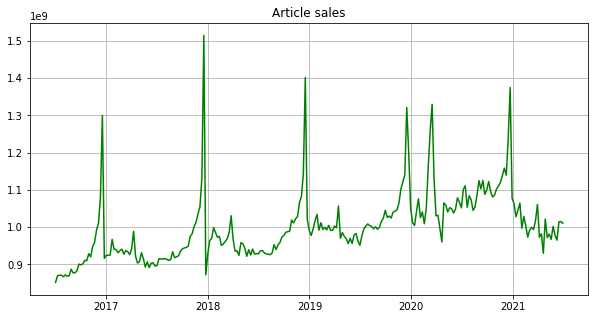

In [15]:
plt.figure(figsize=(10,5))
plt.title('Article sales')
plt.plot(df.ds, df.sales, 'green')
plt.grid()
plt.show()